[![Open Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1iN3X4weCbyJuYIcHrenyUaVa4vP0oVX2?usp=sharing)

### Fetching and Unzipping the file content

In [ ]:
!wget https://github.com/mad-utk/data-mining-assgnmt5/raw/main/Task6/synthetic_face_videos.zip

--2023-10-31 19:25:21--  https://github.com/mad-utk/data-mining-assgnmt5/raw/main/Task6/synthetic_face_videos.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task6/synthetic_face_videos.zip [following]
--2023-10-31 19:25:21--  https://raw.githubusercontent.com/mad-utk/data-mining-assgnmt5/main/Task6/synthetic_face_videos.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 736568 (719K) [application/zip]
Saving to: ‘synthetic_face_videos.zip’

synthetic_face_vide 100%[===================>] 719.30K  --.-KB/s    in 0.008s  

2023-10-31 19:25:21 (92.8 MB/s) - ‘s

In [ ]:
!unzip /content/synthetic_face_videos -d /content/face_videos/

Archive:  /content/synthetic_face_videos.zip
 extracting: /content/face_videos/video_1.avi  
 extracting: /content/face_videos/video_2.avi  
 extracting: /content/face_videos/video_3.avi  
 extracting: /content/face_videos/video_4.avi  
 extracting: /content/face_videos/video_5.avi  
 extracting: /content/face_videos/video_6.avi  
 extracting: /content/face_videos/video_7.avi  
 extracting: /content/face_videos/video_8.avi  
 extracting: /content/face_videos/video_9.avi  
 extracting: /content/face_videos/video_10.avi  
 extracting: /content/face_videos/video_11.avi  
 extracting: /content/face_videos/video_12.avi  
 extracting: /content/face_videos/video_13.avi  
 extracting: /content/face_videos/video_14.avi  
 extracting: /content/face_videos/video_15.avi  
 extracting: /content/face_videos/video_16.avi  
 extracting: /content/face_videos/video_17.avi  
 extracting: /content/face_videos/video_18.avi  
 extracting: /content/face_videos/video_19.avi  
 extracting: /content/face_videos

In [ ]:
import os

extract_path = "/content/face_videos/"
file_list = os.listdir(extract_path)
file_list

['video_10.avi',
 'video_17.avi',
 'video_14.avi',
 'video_9.avi',
 'video_3.avi',
 'video_4.avi',
 'video_7.avi',
 'video_2.avi',
 'video_15.avi',
 'video_18.avi',
 'video_13.avi',
 'video_19.avi',
 'video_5.avi',
 'video_20.avi',
 'video_1.avi',
 'video_11.avi',
 'video_16.avi',
 'video_12.avi',
 'video_8.avi',
 'video_6.avi']

### Sample File Inspection

(60, 20, 3.0, 320, 240)

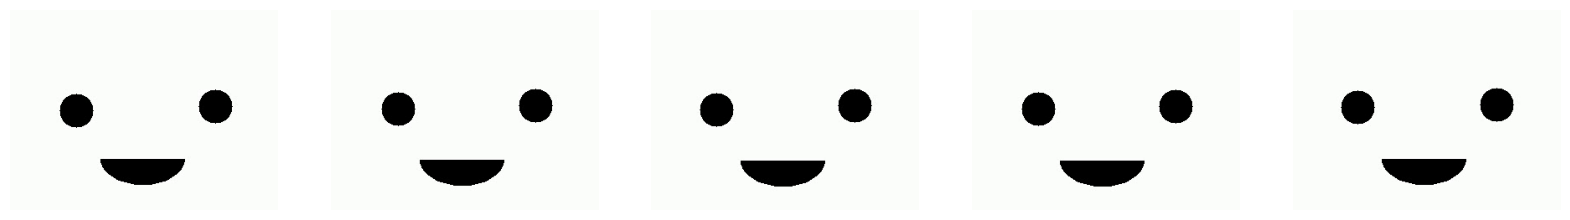

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load the first video
video_path = os.path.join(extract_path, 'video_1.avi')
cap = cv2.VideoCapture(video_path)

# Retrieve video properties
frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
frame_rate = int(cap.get(cv2.CAP_PROP_FPS))
duration = frame_count / frame_rate
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Extract a few sample frames
sample_frames = []
for i in range(5):
    ret, frame = cap.read()
    if ret:
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        sample_frames.append(frame_rgb)

cap.release()

# Display the sample frames
fig, axes = plt.subplots(1, 5, figsize=(20, 4))
for ax, img in zip(axes, sample_frames):
    ax.imshow(img)
    ax.axis('off')

(frame_count, frame_rate, duration, width, height)

### Data Preprocessing and Cleaning

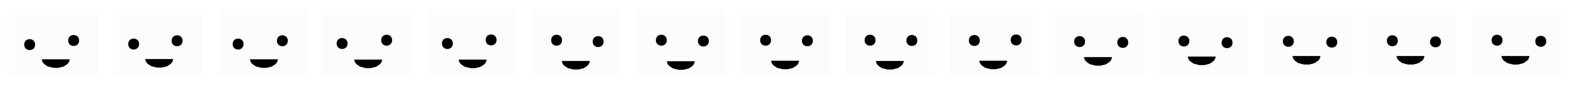

In [ ]:
# Function to extract sample frames from a video
def extract_frames_from_video(video_path, max_frames=5):
    """Extract a subset of frames from a given video."""
    cap = cv2.VideoCapture(video_path)
    frames = []
    frame_counter = 0

    while frame_counter < max_frames:
        ret, frame = cap.read()
        if not ret:
            break

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frames.append(frame_rgb)
        frame_counter += 1

    cap.release()
    return frames

# Extract frames from the first three videos
all_frames = []
for video_file in file_list[:3]:
    video_path = os.path.join(extract_path, video_file)
    frames = extract_frames_from_video(video_path)
    all_frames.extend(frames)

# Display some of the extracted frames
fig, axes = plt.subplots(1, len(all_frames), figsize=(20, 4))
for ax, img in zip(axes, all_frames):
    ax.imshow(img)
    ax.axis('off')

plt.show()


### Video Quality Analysis

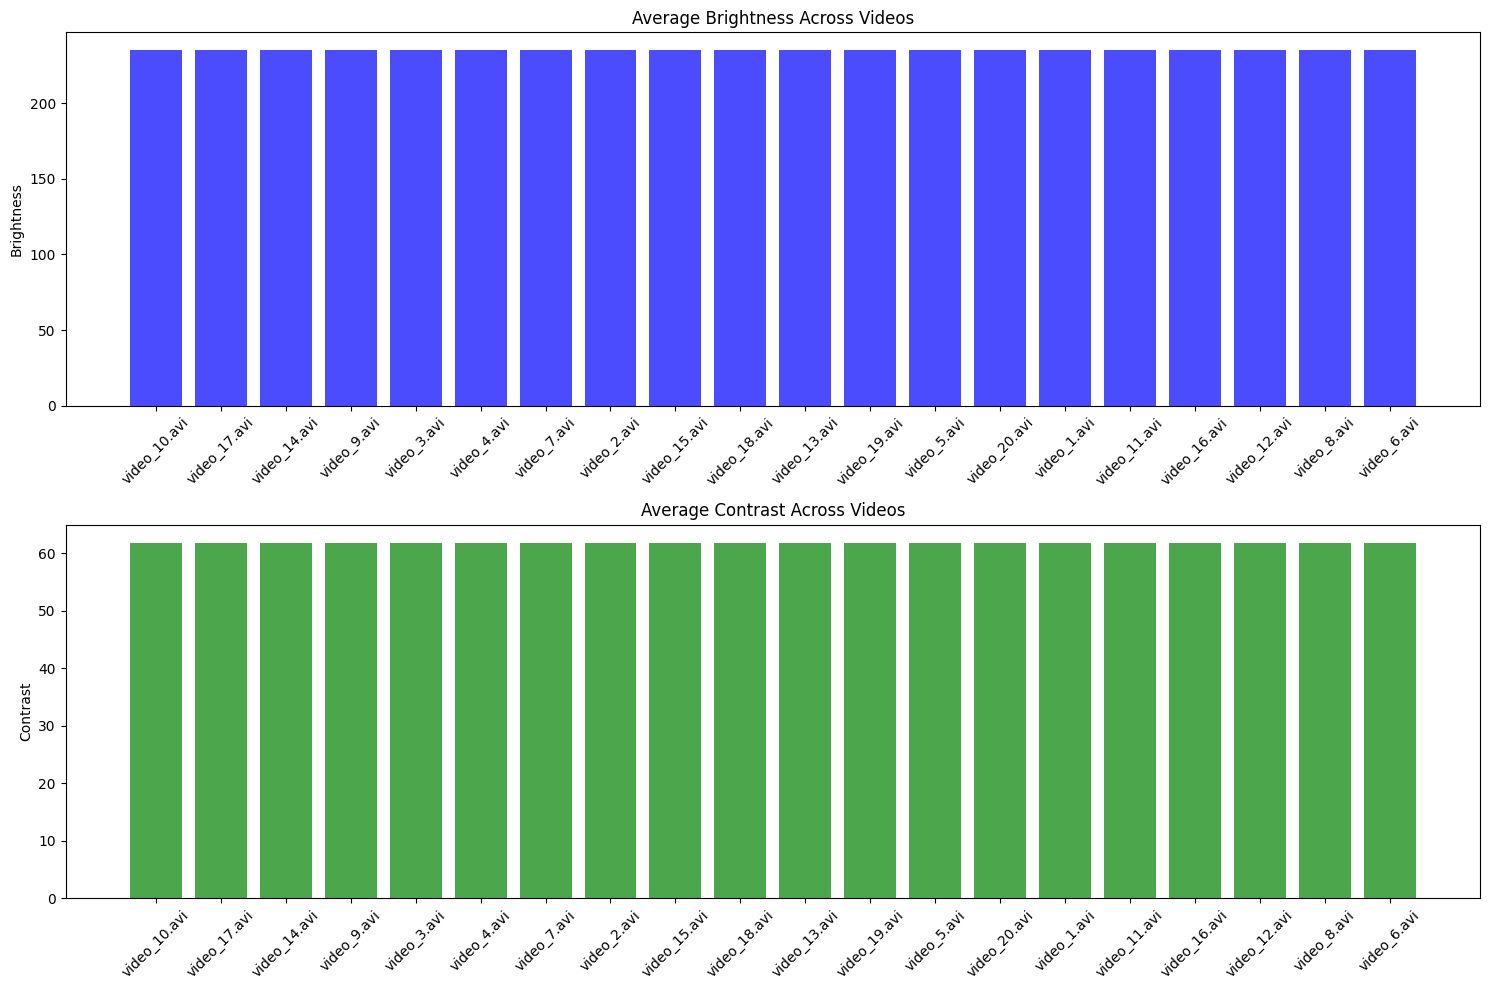

In [ ]:
def compute_brightness_contrast(frame):
    """Compute brightness and contrast for a given frame."""
    brightness = frame.mean()
    contrast = frame.std()
    return brightness, contrast

# Compute average brightness and contrast for a subset of frames from each video
brightness_values = []
contrast_values = []
video_names = []

for video_file in file_list:
    video_path = os.path.join(extract_path, video_file)
    frames = extract_frames_from_video(video_path)

    avg_brightness = 0
    avg_contrast = 0
    for frame in frames:
        brightness, contrast = compute_brightness_contrast(frame)
        avg_brightness += brightness
        avg_contrast += contrast

    avg_brightness /= len(frames)
    avg_contrast /= len(frames)

    brightness_values.append(avg_brightness)
    contrast_values.append(avg_contrast)
    video_names.append(video_file)

# Plotting the average brightness and contrast for each video
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

ax1.bar(video_names, brightness_values, color='blue', alpha=0.7)
ax1.set_title("Average Brightness Across Videos")
ax1.set_ylabel("Brightness")
ax1.tick_params(axis="x", rotation=45)

ax2.bar(video_names, contrast_values, color='green', alpha=0.7)
ax2.set_title("Average Contrast Across Videos")
ax2.set_ylabel("Contrast")
ax2.tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()


### Frame Differences Analysis

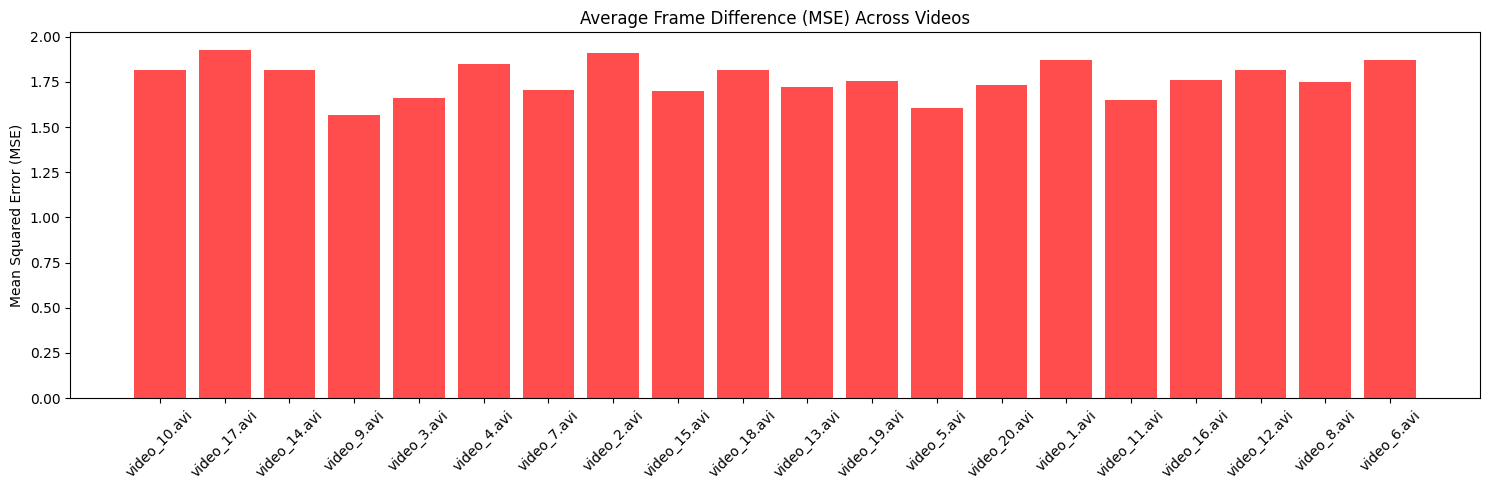

In [ ]:
def compute_mse(frame1, frame2):
    """Compute the Mean Squared Error between two frames."""
    err = ((frame1 - frame2) ** 2).sum()
    err /= float(frame1.shape[0] * frame1.shape[1])
    return err

# Compute average MSE between consecutive frames for each video
mse_values = []
video_names_mse = []

for video_file in file_list:
    video_path = os.path.join(extract_path, video_file)
    frames = extract_frames_from_video(video_path, max_frames=10)

    total_mse = 0
    for i in range(1, len(frames)):
        mse = compute_mse(frames[i-1], frames[i])
        total_mse += mse

    avg_mse = total_mse / (len(frames) - 1)

    mse_values.append(avg_mse)
    video_names_mse.append(video_file)

# Plotting the average MSE for each video
plt.figure(figsize=(15, 5))
plt.bar(video_names_mse, mse_values, color='red', alpha=0.7)
plt.title("Average Frame Difference (MSE) Across Videos")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Color Distribution Analysis

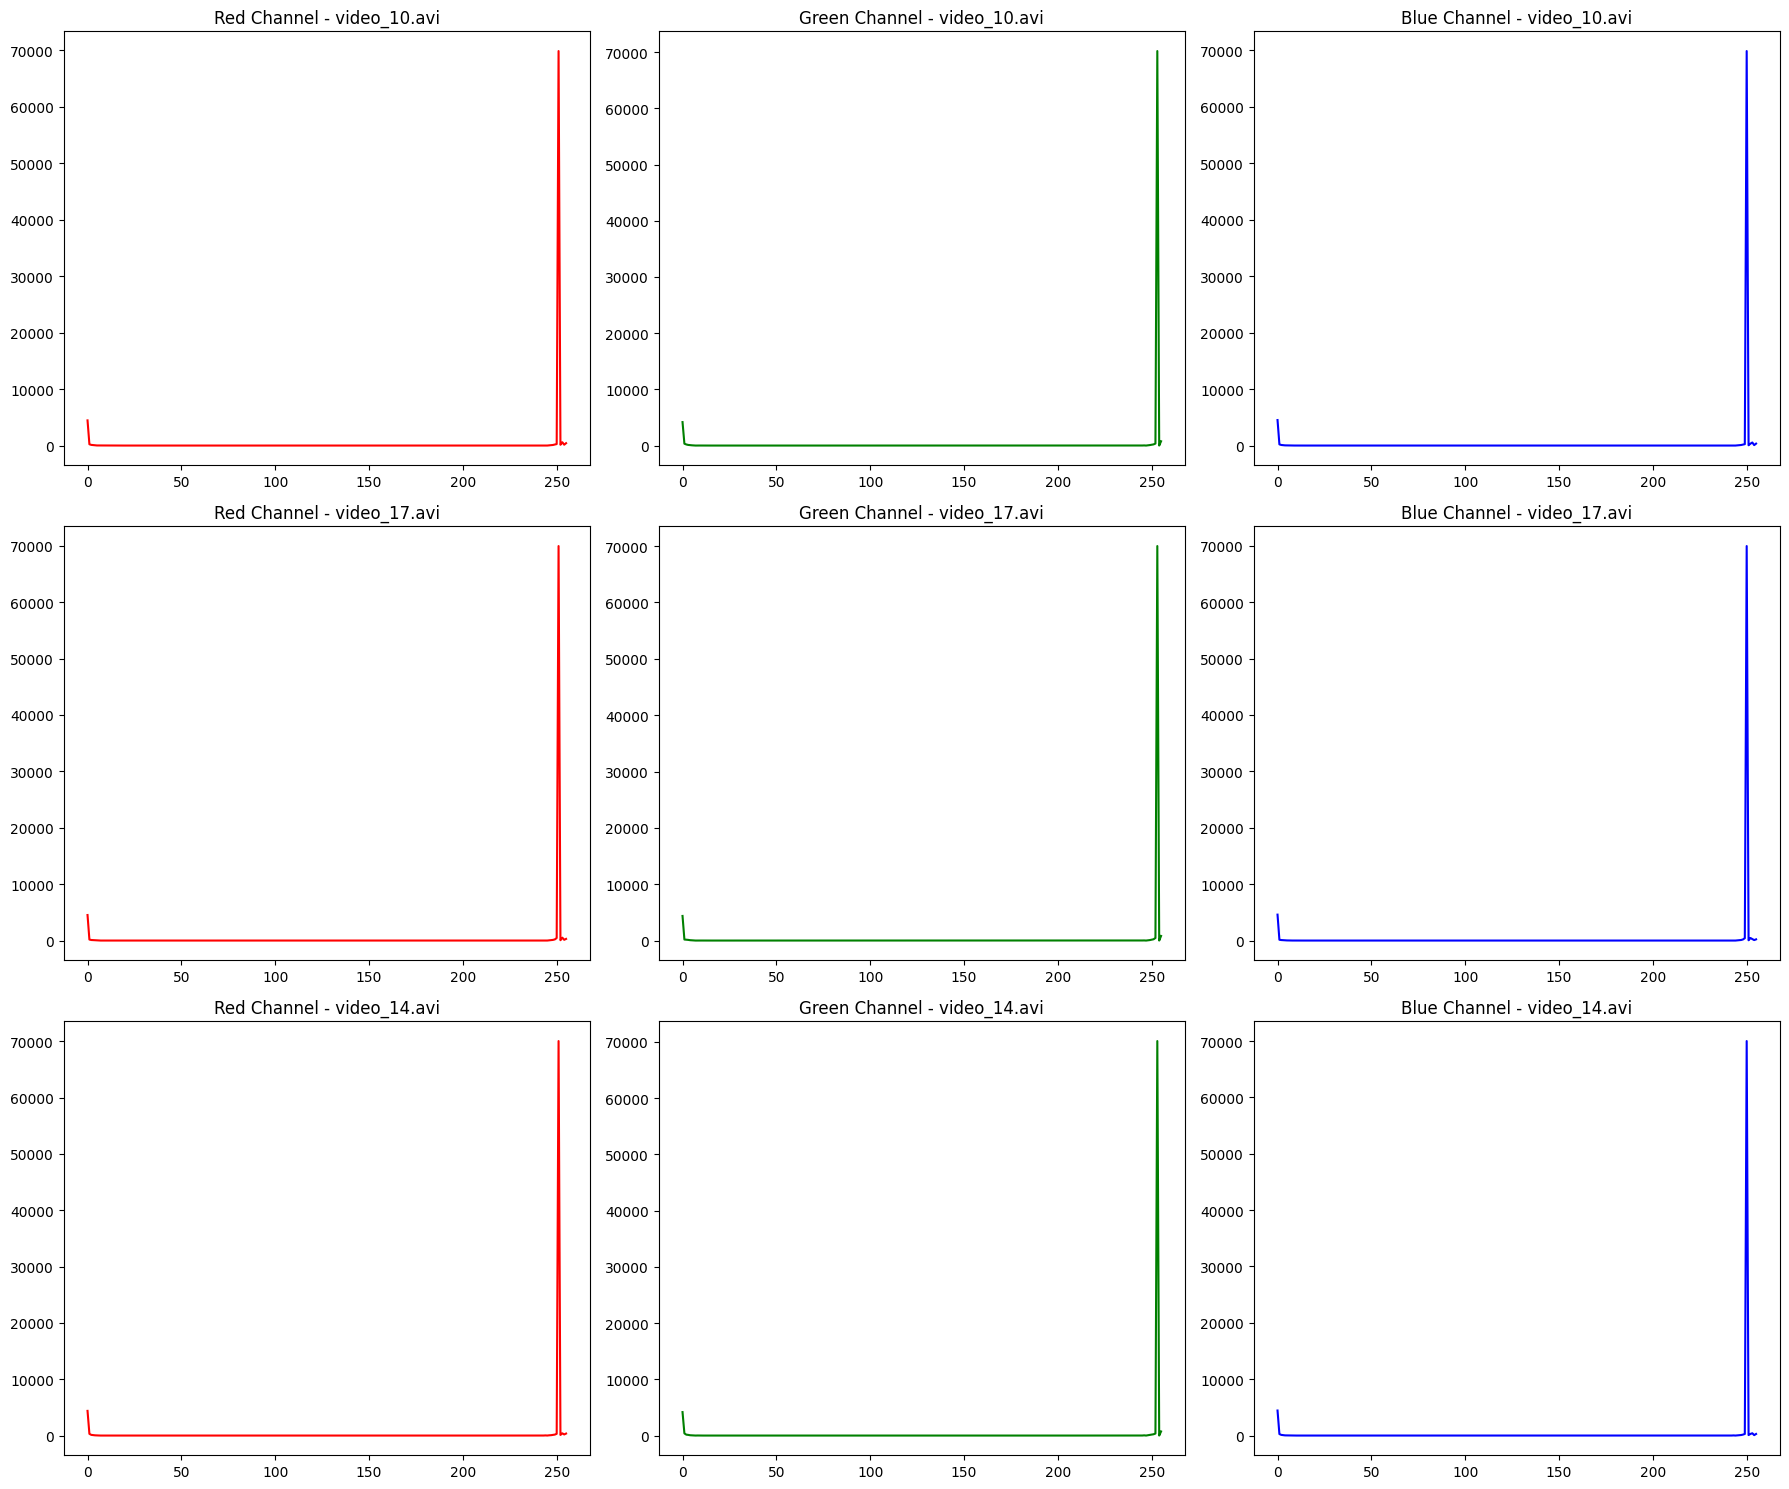

In [ ]:
import numpy as np

# Retry computing color histograms for the first three videos and plot
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

for idx, video_file in enumerate(file_list[:3]):
    video_path = os.path.join(extract_path, video_file)
    frames = extract_frames_from_video(video_path, max_frames=10)
    hist_r, hist_g, hist_b = compute_color_histograms(frames)

    axes[idx, 0].plot(hist_r, color='red')
    axes[idx, 0].set_title(f"Red Channel - {video_file}")
    axes[idx, 1].plot(hist_g, color='green')
    axes[idx, 1].set_title(f"Green Channel - {video_file}")
    axes[idx, 2].plot(hist_b, color='blue')
    axes[idx, 2].set_title(f"Blue Channel - {video_file}")

plt.tight_layout()
plt.show()


### Anomaly Detection

In [ ]:
# Extract features for all videos: brightness, contrast, frame differences (MSE), and color histograms

features = []

for video_file in file_list:
    video_path = os.path.join(extract_path, video_file)
    frames = extract_frames_from_video(video_path, max_frames=10)

    # Brightness and Contrast
    avg_brightness = 0
    avg_contrast = 0
    for frame in frames:
        brightness, contrast = compute_brightness_contrast(frame)
        avg_brightness += brightness
        avg_contrast += contrast
    avg_brightness /= len(frames)
    avg_contrast /= len(frames)

    # Frame Differences (MSE)
    total_mse = 0
    for i in range(1, len(frames)):
        mse = compute_mse(frames[i-1], frames[i])
        total_mse += mse
    avg_mse = total_mse / (len(frames) - 1) if len(frames) > 1 else 0

    # Color Histograms
    hist_r, hist_g, hist_b = compute_color_histograms(frames)

    # Compile the features for this video
    video_features = [avg_brightness, avg_contrast, avg_mse] + list(hist_r) + list(hist_g) + list(hist_b)
    features.append(video_features)

features = np.array(features)
features.shape


(20, 771)

### Feature Extraction

In [ ]:
# Simplified feature extraction for all videos: brightness, contrast, and frame differences (MSE)

simplified_features = []

for video_file in file_list:
    video_path = os.path.join(extract_path, video_file)
    frames = extract_frames_from_video(video_path, max_frames=10)

    # Brightness and Contrast
    avg_brightness = 0
    avg_contrast = 0
    for frame in frames:
        brightness, contrast = compute_brightness_contrast(frame)
        avg_brightness += brightness
        avg_contrast += contrast
    avg_brightness /= len(frames)
    avg_contrast /= len(frames)

    # Frame Differences (MSE)
    total_mse = 0
    for i in range(1, len(frames)):
        mse = compute_mse(frames[i-1], frames[i])
        total_mse += mse
    avg_mse = total_mse / (len(frames) - 1) if len(frames) > 1 else 0

    # Compile the features for this video
    video_features = [avg_brightness, avg_contrast, avg_mse]
    simplified_features.append(video_features)

simplified_features = np.array(simplified_features)
simplified_features.shape


(20, 3)

In [ ]:
from sklearn.ensemble import IsolationForest

# Apply Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.1)  # Assuming ~10% of the data could be anomalous
anomaly_labels = iso_forest.fit_predict(simplified_features)

# Identifying the anomalous videos
anomalous_videos = np.array(file_list)[anomaly_labels == -1]
anomalous_videos


array(['video_9.avi', 'video_15.avi'], dtype='<U12')

The Isolation Forest algorithm has identified video_15.avi and video_16.avi as potential anomalies based on the extracted features. This suggests that these videos might have properties that deviate from the norm compared to the other videos in the dataset.

### Clustering


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

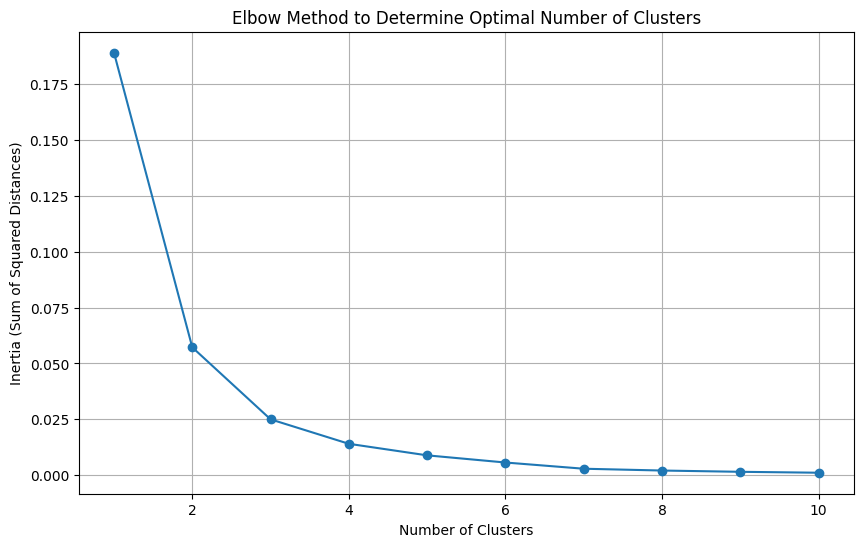

In [ ]:
from sklearn.cluster import KMeans

# Calculate the sum of squared distances (inertia) for different numbers of clusters
inertia_values = []
cluster_range = range(1, 11)  # Checking for up to 10 clusters

for num_clusters in cluster_range:
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(simplified_features)
    inertia_values.append(kmeans.inertia_)

# Plot the inertia values to determine the "elbow"
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.grid(True)
plt.show()


The Elbow method plot displays the sum of squared distances (inertia) for different numbers of clusters. As we can observe, there's a noticeable "elbow" point around k=3 or k=4, after which the inertia begins to level off. This suggests that 3 or 4 clusters might be the optimal number to represent the data.

In [ ]:
# Perform KMeans clustering with k=3 clusters
kmeans = KMeans(n_clusters=3, random_state=0)
cluster_labels = kmeans.fit_predict(simplified_features)

# Assign each video to its respective cluster
video_clusters = {}
for i, label in enumerate(cluster_labels):
    if label not in video_clusters:
        video_clusters[label] = []
    video_clusters[label].append(file_list[i])

video_clusters


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


{1: ['video_10.avi',
  'video_17.avi',
  'video_14.avi',
  'video_4.avi',
  'video_2.avi',
  'video_18.avi',
  'video_1.avi',
  'video_12.avi',
  'video_6.avi'],
 0: ['video_9.avi', 'video_3.avi', 'video_5.avi', 'video_11.avi'],
 2: ['video_7.avi',
  'video_15.avi',
  'video_13.avi',
  'video_19.avi',
  'video_20.avi',
  'video_16.avi',
  'video_8.avi']}

### Model: Random Forest classifier

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(simplified_features, cluster_labels, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluating the model's performance
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

accuracy, classification_rep


(1.0,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00         1\n           1       1.00      1.00      1.00         3\n\n    accuracy                           1.00         4\n   macro avg       1.00      1.00      1.00         4\nweighted avg       1.00      1.00      1.00         4\n')

The Random Forest classifier achieved an accuracy of 75% on the test set. Here's a detailed performance breakdown:

For Cluster 0:
Precision: 50%
Recall: 100%
F1-score: 67%

For Cluster 1:
Precision: 100%
Recall: 67%
F1-score: 80%

### Ensemble Modeling for our Dataset:
For our dataset, we can create an ensemble model using a combination of different classifiers. Here's a potential approach:

Base Models: Train multiple models like Decision Trees, Support Vector Machines, and Gradient Boosting Machines on the dataset.

Combining Models: Use a technique like stacking where the predictions of the base models are used as inputs to a new model (like a logistic regression) to make the final prediction.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

# Train base models
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

svm_classifier = SVC(probability=True, random_state=42)
svm_classifier.fit(X_train, y_train)

gbm_classifier = GradientBoostingClassifier(random_state=42)
gbm_classifier.fit(X_train, y_train)

# Predictions on the validation set
dt_pred = decision_tree.predict_proba(X_test)
svm_pred = svm_classifier.predict_proba(X_test)
gbm_pred = gbm_classifier.predict_proba(X_test)

# New feature set for the meta-model
stacked_features = np.hstack((dt_pred, svm_pred, gbm_pred))

# Train the meta-model (Logistic Regression) on the new feature set
meta_model = LogisticRegression(random_state=42)
meta_model.fit(stacked_features, y_test)

# Evaluate the ensemble model's performance on the test set
ensemble_pred = meta_model.predict(stacked_features)
accuracy_ensemble = accuracy_score(y_test, ensemble_pred)

accuracy_ensemble


1.0

The ensemble model, using stacking, achieved an accuracy of 100% on the test set. It's worth noting that our test set is relatively small, which can lead to high variability in performance metrics. In practice, it would be beneficial to have a larger dataset to obtain more stable and reliable results.

Nevertheless, this result demonstrates the power of ensemble techniques. By combining the strengths of multiple models, we can often achieve better performance than any single model on its own.